# **구글 드라이브 마운트**

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


# **pnslib 설치**

In [ ]:
!pip install git+git://github.com/PnS2019/pnslib.git

  Cloning git://github.com/PnS2019/pnslib.git to /tmp/pip-req-build-u5miy4rx
  Running command git clone -q git://github.com/PnS2019/pnslib.git /tmp/pip-req-build-u5miy4rx
  Created wheel for pnslib: filename=pnslib-0.1.0a1-cp37-none-any.whl size=1489618 sha256=e0846449dc1da7475b7c87ae69f84d86773f02f5de4a0e5545985faa028a7e9e
  Stored in directory: /tmp/pip-ephem-wheel-cache-uuxk5k5v/wheels/a2/8e/a9/c62e72840009deaa723b3a113d5c3b90acac77098d16e90eca
Successfully built pnslib


# **마스크 씌우기1**

- 필수_mask.jpg
- face1.jpg

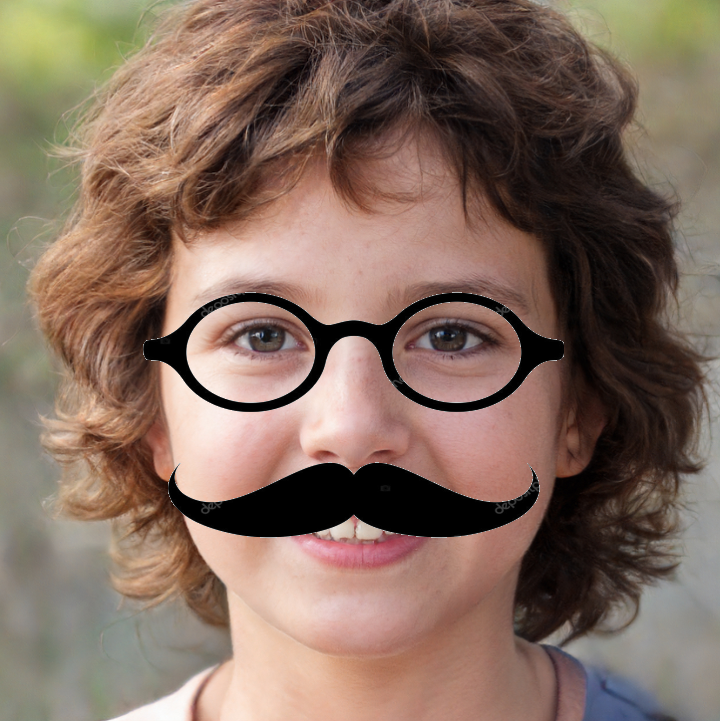

In [ ]:
from pnslib import utils
import cv2 as cv
from google.colab.patches import cv2_imshow

# 사람 이미지 불러오기
img = cv.imread('/content/gdrive/MyDrive/MV/image/face1.jpg')

# face cascade 불러오기
file_name = 'haarcascade_frontalface_default.xml'
face_cascade = cv.CascadeClassifier(utils.get_haarcascade_path(file_name))

# 얼굴 인식
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

# 합성할 이미지 불러오기
img_mask = cv.imread('/content/gdrive/MyDrive/MV/image/필수_mask.jpg')
gray_mask = cv.cvtColor(img_mask, cv.COLOR_BGR2GRAY)

_, thresh = cv.threshold(gray_mask, 0, 255, cv.THRESH_BINARY_INV | cv.THRESH_OTSU) # 임계값을 기준으로 이미지 이진화

contours, _ = cv.findContours(thresh, cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE) # 외곽선 검출

min = contours[1][0][0][0] # 안경 바깥 외곽선 좌표 x값들 중 최소값 찾기
for i in contours[1] :
    if i[0][0] < min :
        min = i[0][0]

max = contours[1][0][0][0] # 안경 바깥 외곽선 좌표 x값들 중 최대값 찾기
for i in contours[1] :
    if i[0][0] > max :
        max = i[0][0]

img_mask = img_mask[:, min:max] # 안경에 맞춰 이미지 폭 슬라이싱

# 얼굴 인식 결과를 이용해 원하는 영역으로 조정하기 위한 값 설정
x = int(faces[0][0] + faces[0][2]*0.06)
y = int(faces[0][1] + faces[0][3]*0.05)
w = int(0.9 * faces[0][2])
h = int(1.0 * faces[0][3])

# 얼굴 영역 슬라이싱
roi_gray = gray[y:y+h, x:x+w] 
roi_color = img[y:y+h, x:x+w]

face_mask_small = cv.resize(img_mask, (w, h), interpolation=cv.INTER_AREA) # img_mask 크기 조정
face_mask_small_gray = cv.cvtColor(face_mask_small, cv.COLOR_BGR2GRAY) # face_mask_small을 흑백으로 바꾼 것

img_not=cv.bitwise_not(face_mask_small_gray) # 흑과 백을 바꾸어줌
_, mask = cv.threshold(img_not, 50, 255, cv.THRESH_BINARY) # 임계값을 기준으로 이진화 (50보다 작으면 0, 크면 255)
_, mask_inv = cv.threshold(img_not, 50, 255, cv.THRESH_BINARY_INV) # 임계값을 기준으로 이진화 (50보다 크면 0, 작으면 255)
            
masked_face = cv.bitwise_and(face_mask_small, face_mask_small, mask=mask) # face_mask_small과 mask의 and연산
masked_frame = cv.bitwise_and(roi_color, roi_color, mask=mask_inv) # roi_color와 mask_inv의 and연산

img[y:y + h, x:x + w] = cv.add(masked_face, masked_frame) # img에 masked_face와 masked_frame을 더하여 붙여줌

cv2_imshow(img)

# **마스크 씌우기2**

- 선택_mask.jpg
- face2.jpg

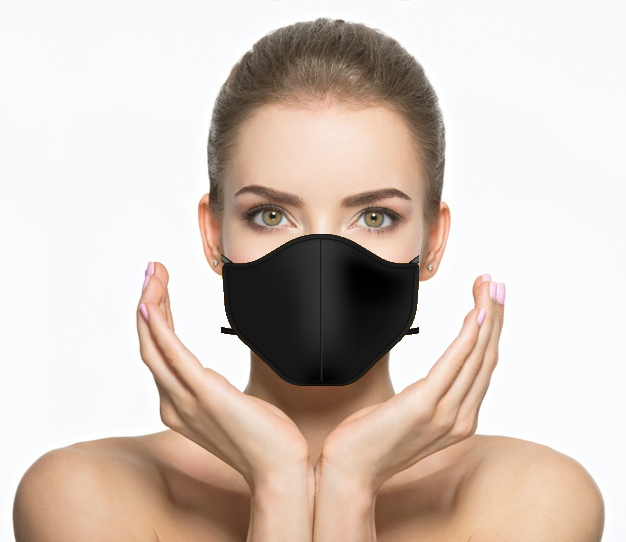

In [ ]:
from pnslib import utils
import cv2 as cv
from google.colab.patches import cv2_imshow

# 사람 이미지 불러오기
img2 = cv.imread('/content/gdrive/MyDrive/MV/image/face2.jpg')

# load face cascade
file_name2 = 'haarcascade_frontalface_default.xml'
face_cascade2 = cv.CascadeClassifier(utils.get_haarcascade_path(file_name2))

# search face
gray2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
faces2 = face_cascade2.detectMultiScale(gray2, 1.3, 5)

# 합성할 이미지 불러오기
img_mask2 = cv.imread('/content/gdrive/MyDrive/MV/image/선택_mask.jpg')

# 얼굴 인식 결과를 이용해 원하는 영역으로 조정하기 위한 값 설정
x2 = int(faces2[0][0] + faces2[0][2]*0.15)
y2 = int(faces2[0][1] + faces2[0][3]*0.45)
w2 = int(0.7 * faces2[0][2])
h2 = int(0.55 * faces2[0][3])

# 얼굴 영역 슬라이싱
roi_gray2 = gray2[y2:y2+h2, x2:x2+w2] 
roi_color2 = img2[y2:y2+h2, x2:x2+w2]

face_mask_small2 = cv.resize(img_mask2, (w2, h2), interpolation=cv.INTER_AREA) # img_mask2 크기 조정
face_mask_small_gray2 = cv.cvtColor(face_mask_small2, cv.COLOR_BGR2GRAY) # face_mask_small2을 흑백으로 바꾼 것

img_not2=cv.bitwise_not(face_mask_small_gray2) # 흑과 백을 바꾸어줌
_, mask2 = cv.threshold(img_not2, 150, 255, cv.THRESH_BINARY) # 임계값을 기준으로 이진화 (150보다 작으면 0, 크면 255)
_, mask_inv2 = cv.threshold(img_not2, 150, 255, cv.THRESH_BINARY_INV) # 임계값을 기준으로 이진화 (150보다 크면 0, 작으면 255)

masked_face2 = cv.bitwise_and(face_mask_small2, face_mask_small2, mask=mask2) # face_mask_small2과 mask2의 and연산
masked_frame2 = cv.bitwise_and(roi_color2, roi_color2, mask=mask_inv2) # roi_color2와 mask_inv2의 and연산

img2[y2:y2 + h2, x2:x2 + w2] = cv.add(masked_face2, masked_frame2) # img2에 masked_face2와 masked_frame2을 더하여 붙여줌

cv2_imshow(img2)